<a href="https://colab.research.google.com/github/arizonaCameraLab/computationalImaging/blob/master/Chapter7CoherenceImaging/simulation_of_RSI_Signals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulation of RSI Signals

## ChatGPT o1 Pro
##  Generated 5 February 2025
## with prompts from David Brady




# Rotational Interferometer Signal

A point source emitting the spectrum $S(\nu)$ at angular position $\theta_x, \theta_y$ produces a signal on a rotational interferometer equal to:

$$
I(x,y) \;=\; \int S(\lambda)\,d\lambda
\;+\;
\int S(\lambda)\,\cos\!\Bigl[4 \pi \,\frac{\theta_x \, x + \theta_y \, y}{\lambda}\Bigr]\,d\lambda.
$$

Suppose that $S(\lambda)$ is a Gaussian-distributed source with center wavelength $\lambda_0 = 550\,\mathrm{nm}$ and width $\sigma = 50\,\mathrm{nm}$. In this case, we define:

$$
S(\lambda) \;=\; \exp\!\Bigl[
  - \tfrac{(\lambda - \lambda_0)^2}{2\,\sigma^2}
\Bigr].
$$

(You can include a normalization factor if needed, but for demonstration we may omit it.)

We wish to compute:

$$
I(x,y) \;=\;
\underbrace{\int S(\lambda)\,d\lambda}_{\text{constant w.r.t }(x,y)}
\;+\;
\int S(\lambda)\cos\!\Bigl[
  4\pi\,\frac{\theta_x\,x + \theta_y\,y}{\lambda}
\Bigr]\!d\lambda,
$$

for angles $\theta_x = 0.01$ and $\theta_y = 0.02$, over the range $x,y\in[-0.5\,\mathrm{mm}, 0.5\,\mathrm{mm}]$.

---

## Key Points / Assumptions

1. **Gaussian Spectrum**  
   We define
   $$
   S(\lambda) = \exp\!\Bigl(
     - \tfrac{(\lambda - \lambda_0)^2}{2\,\sigma^2}
   \Bigr),
   $$
   where $\lambda_0 = 550\,\mathrm{nm}$ and $\sigma = 50\,\mathrm{nm}$.

2. **Units**  
   - Wavelength $\lambda$ is in meters (e.g., $550\,\text{nm} = 5.5 \times 10^{-7}\,\text{m}$).  
   - Coordinates $x,y$ are in meters (e.g., $0.5\,\text{mm} = 5.0 \times 10^{-4}\,\text{m}$).  
   - Angles $\theta_x,\theta_y$ are in radians.

3. **Numerical Integration**  
   We use a discrete set of $\lambda$-values (for instance, spanning $400\,\text{nm}$ to $700\,\text{nm}$) and perform a numerical integration (e.g., with `np.trapz`).

4. **Grid/Plot**  
   - Create a 2D grid of $(x,y)$ points over the desired range.  
   - For each point $(x_i,y_j)$, evaluate
     $$
     I(x_i,y_j) =
     \int S(\lambda)\,d\lambda
     \;+\;
     \int S(\lambda)\cos\!\Bigl[
       4\pi\,\frac{\theta_x\,x_i + \theta_y\,y_j}{\lambda}
     \Bigr]\!d\lambda.
     $$
   - Display $I(x,y)$ as a 2D image using a suitable colormap.

---

## Notes on the Computation

### Units

- $x,y$ range from $-0.5\,\text{mm}$ to $+0.5\,\text{mm}$.  
- $\lambda$ ranges from $400\,\text{nm}$ to $700\,\text{nm}$.  
- $\theta_x = 0.01$ and $\theta_y = 0.02$ in radians.

### Numerical Integration

We use `np.trapz` to approximate the integrals:

$$
\int S(\lambda)\,d\lambda
\quad \text{and} \quad
\int S(\lambda)\,\cos\Bigl[4\pi\,\frac{\theta_x x + \theta_y y}{\lambda}\Bigr] \, d\lambda.
$$

### Speed Considerations

For large grids or a large $\lambda$-array, vectorization or just-in-time compilation (e.g., with `numba`) can speed up the calculation.

### Normalization

If you need to normalize the Gaussian spectrum, include the factor $\frac{1}{\sigma \sqrt{2\pi}}$ in the definition of $S(\lambda)$. This rescales $I(x,y)$ accordingly but does not affect the overall shape.

```

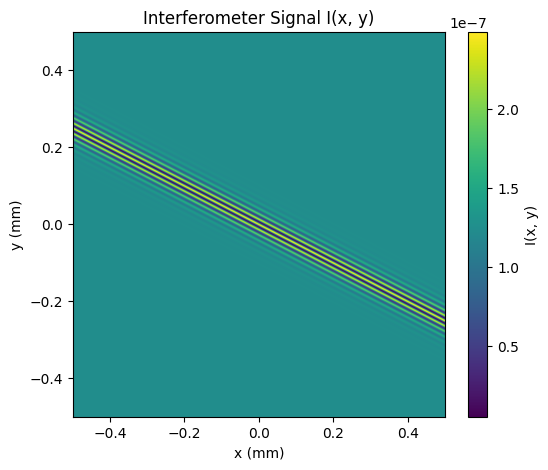

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------------------
# Define the Gaussian spectral distribution S(λ)
# --------------------------------------------------
def S(lam):
    """
    Gaussian spectrum centered at lam0 with width sigma.
    Returns the value of the spectral density at wavelength lam.
    """
    lam0  = 550e-9   # center at 550 nm, in meters
    sigma = 50e-9    # standard deviation 50 nm, in meters
    return np.exp(-0.5 * ((lam - lam0)/sigma)**2)


# --------------------------------------------------
# Compute I(x, y)
# --------------------------------------------------
def I_xy(x, y, theta_x, theta_y, lam_array):
    """
    Returns the interferometer signal I(x, y) for the given x, y.
    I(x, y) = ∫ S(λ) dλ + ∫ S(λ) cos[4π(θx x + θy y)/λ] dλ.
    """
    # Evaluate S(lam) on our grid of lam.
    s_vals = S(lam_array)
    # The step size in lam (assuming equally spaced lam_array).
    dlam = lam_array[1] - lam_array[0]

    # 1) Integral of S(λ)
    integral_1 = np.trapz(s_vals, dx=dlam)

    # 2) Integral of S(λ) * cos( ...)
    phase = 4.0 * np.pi * (theta_x*x + theta_y*y) / lam_array
    cos_term = np.cos(phase)
    integral_2 = np.trapz(s_vals * cos_term, dx=dlam)

    return integral_1 + integral_2


# --------------------------------------------------
# Main script: set up grid and compute I(x,y)
# --------------------------------------------------

# 1) Define wavelength array (covering ~400 nm to 700 nm)
lam_min = 400e-9
lam_max = 700e-9
num_lams = 300
lam_array = np.linspace(lam_min, lam_max, num_lams)

# 2) Define angular offsets (in radians)
theta_x = 0.01
theta_y = 0.02

# 3) Define x,y range in meters (-0.5 mm to +0.5 mm)
x_min, x_max = -0.5e-3, 0.5e-3
y_min, y_max = -0.5e-3, 0.5e-3

# Number of points in x,y for the plot
num_points = 1000
x_vals = np.linspace(x_min, x_max, num_points)
y_vals = np.linspace(y_min, y_max, num_points)

# Create a meshgrid of x,y
X, Y = np.meshgrid(x_vals, y_vals, indexing='xy')

# 4) Compute I(x,y) over the grid
I_values = np.zeros_like(X)

# Vectorized approach is possible, but here we show a simple loop for clarity
for i in range(num_points):
    for j in range(num_points):
        I_values[j, i] = I_xy(X[j,i], Y[j,i], theta_x, theta_y, lam_array)
        # Note: indexing might differ if you prefer X[i,j].  Just be consistent
        # with row, column ordering. We used j for row (y) and i for column (x).

# --------------------------------------------------
# Plot the results
# --------------------------------------------------
plt.figure(figsize=(6,5))
# extent defines the coordinate system to label the axes correctly
plt.imshow(I_values, extent=[x_min*1e3, x_max*1e3, y_min*1e3, y_max*1e3],
           origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='I(x, y)')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.title('Interferometer Signal I(x, y)')
plt.show()
